In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
diab = pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>]], dtype=object)

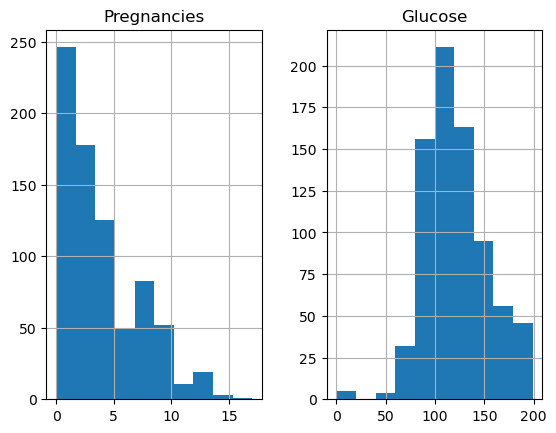

In [10]:
diab[['Pregnancies', 'Glucose']].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x22299bc23f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2229ac0c650>,
 'boxes': [<matplotlib.lines.Line2D at 0x22299bc0080>,
 'medians': [<matplotlib.lines.Line2D at 0x2229ac0cc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x2229ac0ce90>,
 'means': []}

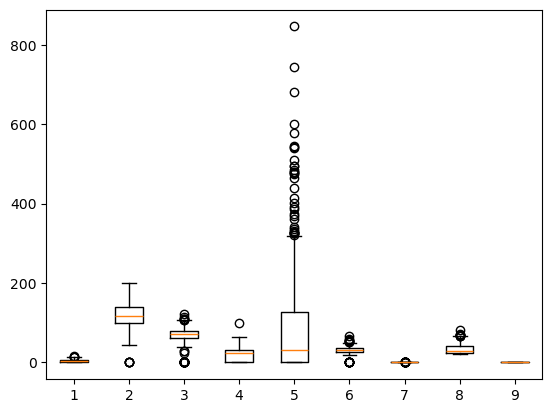

In [13]:
plt.boxplot(diab)

In [14]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
numcol = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in numcol:
    Q1 = diab[col].quantile(0.25)
    Q3 = diab[col].quantile(0.75)
    print("column :",col)
    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    # Define bounds
    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(lbound,ubound)
    # Replace outliers with the respective bounds
    diab[col] = np.where(diab[col] > ubound, ubound, 
                            np.where(diab[col] < lbound, lbound, diab[col]))

column : Pregnancies
1.0 6.0 5.0
-6.5 13.5
column : Glucose
99.0 140.25 41.25
37.125 202.125
column : BloodPressure
62.0 80.0 18.0
35.0 107.0
column : SkinThickness
0.0 32.0 32.0
-48.0 80.0
column : Insulin
0.0 127.25 127.25
-190.875 318.125
column : BMI
27.3 36.6 9.3
13.35 50.550000000000004
column : DiabetesPedigreeFunction
0.24375 0.62625 0.38249999999999995
-0.32999999999999996 1.2
column : Age
24.0 41.0 17.0
-1.5 66.5


{'whiskers': [<matplotlib.lines.Line2D at 0x2229b084530>,
 'caps': [<matplotlib.lines.Line2D at 0x2229b084bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2229b084320>,
 'medians': [<matplotlib.lines.Line2D at 0x2229b085130>,
 'fliers': [<matplotlib.lines.Line2D at 0x2229b085310>,
 'means': []}

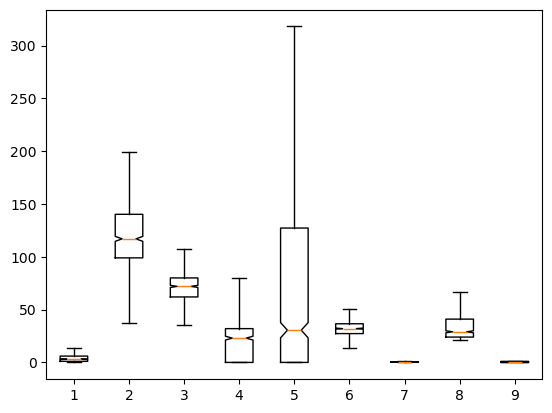

In [17]:
plt.boxplot(diab,notch = 'True')

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

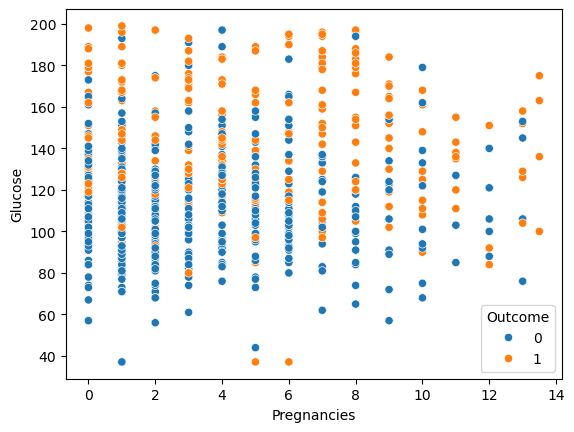

In [20]:
sns.scatterplot(x='Pregnancies', y='Glucose',
                hue='Outcome', data=diab)